**CS596 - Machine Learning**
<br>
Date: **12 October 2020**
<br>
Title: **Seminar 5 - Midterm Exam 1A**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

<h3 align="center">Problem 1: Matrix Norms</h3>

- Let's consider the matrix:

$$A = \begin{bmatrix}
4 & 2 &  2 & 1\\ 
0 & 2 & -1 & -2 
\end{bmatrix}.$$


- **Variant 1**. Calculate the following norms:
  1. $\left \| A \right \|_1$
  2. $\left \| A \right \|_{sum}$
  3. $\left \| A \right \|_\infty$
  4. $\left \| A \right \|_{*}$
  5. $\left \| A \right \|_{F}$
  
  
- **Variant 3**. Calculate the following norms:
  1. $\left \| A \right \|_1$
  2. $\left \| A \right \|_\infty$
  3. $\left \| A \right \|_{sum}$
  4. $\left \| A \right \|_{F}$
  5. $\left \| A \right \|_{*}$

<h3 align="center">Problem 2: Naive Bayes Classifier</h3>

- Given the symptoms and diagnoses of several examined patients:


| Chills | Runny nose | Headache | Fever | Flu? |
|:------:|------------|----------|-------|------|
|   Yes  |     No     |   Mild   |  Yes  |  Yes  |
|   Yes  |     Yes    |   Week   |   No  |  Yes |
|   Yes  |     No     |  Strong  |  Yes  |  Yes |
|   No   |     Yes    |   Mild   |  Yes  |  Yes |
|   No   |     No     |   Week   |   No  |  No  |
|   No   |     Yes    |  Strong  |  Yes  |  Yes |
|   No   |     Yes    |  Strong  |   No  |  No  |
|   Yes  |     Yes    |   Mild   |   No  |  Yes |

- **Variant 1**. Suppose that we have a new patient with **chill**, **mild headache** and **no fever**, what is the probability that he has a **flu**?


- **Variant 3**. Suppose that we have a new patient with **no chill**, **running nose**, **strong headache** and **fever**, what is the probability that he has a **flu**?

- Perform the next steps:
  1. Define the subsets $B_i$: $B = B_1 \cup  B_2 \cup \cdots  \cup  B_n$ and $A$;
  2. Calculate the individual probabilities with respect to each feature of interest;
  3. Apply **Laplace smoothing** if needed;
  4. Calculate the total probability for $A$ and $\overline{A}$;
  5. Obtain the final probability.

<h3 align="center">Solution of Problem 2A</h3>

0. Remember the Extended Naive Bayes's theorem:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B| \overline{A})P(\overline{A})};$$
$$P(B|A) = P(B_1|A)\times P(B_2|A)\times P(B_3|A)\times P(B_4|A)$$ 
$$P(B|\overline{A}) = P(B_1|\overline{A})\times P(B_2|\overline{A})\times P(B_3|\overline{A})\times P(B_4|\overline{A}).$$

1. Define the subsets $B_i$: $B = B_1 \cup  B_2 \cup  B_3 \cup  B_4$, where:

 - $B_1 : \{ \text{Text = "A "}\}$;
 - $B_2 : \{ \text{Text = "very"}\}$;
 - $B_3 : \{ \text{Text = "close"}\}$;
 - $B_4 : \{ \text{Text = "game"}\}$;

2. Calculate the individual probabilities with respect to each feature of interest:

|     Word    | Sports | Not Sports | P(Sports)         | P(Not Sports)         |
|:-----------:|:---:|----|----------------|---------------|
| a           |  2  |  1 | $\frac{2}{11}$ | $\frac{1}{9}$ |
| great       |  1  |  0 |                |               |
| very        |  1  |  0 | $\frac{1}{11}$ | $\frac{0}{9}$ |
| over        |  0  |  1 |                |               |
| it          |  0  |  1 |                |               |
| but         |  1  |  0 |                |               |
| game        |  2  |  0 | $\frac{2}{11}$ | $\frac{0}{9}$ |
| election    |  0  |  2 |                |               |
| clean       |  2  |  0 |                |               |
| close       |  0  |  1 | $\frac{0}{11}$ | $\frac{1}{9}$ |
| the         |  0  |  1 |                |               |
| was         |  0  |  2 |                |               |
| forgettable |  1  |  0 |                |               |
| match       |  1  |  0 |                |               |
| Total       |  11 |  9 |                |               |

&emsp; &ensp; We run into a problem here: **“close” doesn’t appear in any Sports text**: 
<br> &emsp; &ensp; since in a multiplication **if one of the terms is zero**, the **whole probability is nullified**.

3. Apply so called **Laplace smoothing**: we add $1$ to every count so it’s never zero:

|     Word    | Sports | Not Sports | P(Sports)         | P(Not Sports)         |
|:-----------:|:---:|----|----------------|---------------|
| **a**       |  3  |  2 | $\frac{3}{25}$ | $\frac{2}{23}$ |
| great       |  2  |  1 | $\frac{2}{25}$ | $\frac{1}{23}$ |
| **very**    |  2  |  1 | $\frac{2}{25}$ | $\frac{1}{23}$ |
| over        |  1  |  2 | $\frac{1}{25}$ | $\frac{2}{23}$ |
| it          |  1  |  2 | $\frac{1}{25}$ | $\frac{2}{23}$ |
| but         |  2  |  1 | $\frac{2}{25}$ | $\frac{1}{23}$ |
| **game**    |  3  |  1 | $\frac{3}{25}$ | $\frac{1}{23}$ |
| election    |  1  |  3 | $\frac{1}{25}$ | $\frac{3}{23}$ |
| clean       |  3  |  1 | $\frac{3}{25}$ | $\frac{1}{23}$ |
| **close**   |  1  |  2 | $\frac{1}{25}$ | $\frac{2}{23}$ |
| the         |  1  |  2 | $\frac{1}{25}$ | $\frac{2}{23}$ |
| was         |  1  |  3 | $\frac{1}{25}$ | $\frac{3}{23}$ |
| forgettable |  2  |  1 | $\frac{2}{25}$ | $\frac{1}{23}$ |
| match       |  2  |  1 | $\frac{2}{25}$ | $\frac{1}{23}$ |
| Total       |  25 | 23 | 1 | 1 |

4. Calculate the total probability for $A$ and $\overline{A}$:

|          | Tag    | Probability      |
|:---------|:------:|:----------------:|
| Sports   |   25   | $\frac{25}{48}$  |
|Not Sports|  23    | $\frac{23}{48}$  |
| Total    |   48   | 1                |


5. Now we just multiply all the probabilities and obtain the result:

$$P(A|B) = \frac{ \frac{3}{25} \cdot \frac{2}{25} \cdot \frac{3}{25} \cdot \frac{1}{25} \cdot \frac{25}{48} }
{\frac{3}{25} \cdot \frac{2}{25} \cdot \frac{3}{25} \cdot \frac{1}{25} \frac{25}{48} + 
 \frac{2}{23} \cdot \frac{1}{23} \cdot \frac{1}{23} \cdot \frac{2}{23} \frac{23}{48} } = 0.78$$

&emsp; &ensp; Excellent! Our classifier gives “**A very close game**” the **Sports** tag with **78% probability**.

<h3 align="center">Problem 3: The Multi-Class Cofusion Matrix</h3>

- Given a **confusion matrix** for some classifier:

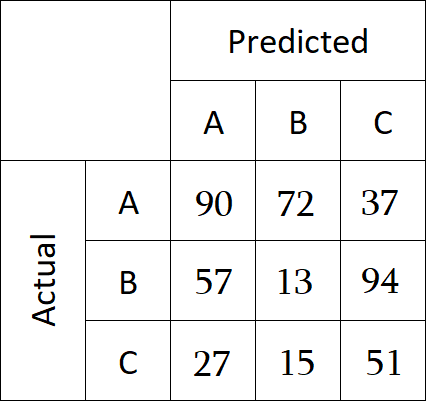

- **Variant 2**. Calculate the following **metrics**:
  1. **Sensitivity** (or **Recall**) of the classifier (**overall**);
  2. **Specificity** of the classifier.
  3. **Accuracy** of the classifier.
  4. The **True Negative Rate** for the **class C**.
  5. **Precision** for the **class B**.
  


- **Varian 4**.  Calculate the following **metrics**:
  1. **Sensitivity** (or **Recall**) of the classifier (**overall**);
  2. **Specificity** of the classifier.
  3. **Accuracy** of the classifier.
  4. The **True Negative Rate** for the **class A**.
  5. **Precision** for the **class C**.


- **Hint**: You can use the link: https://dev.to/overrideveloper/understanding-the-confusion-matrix-264i

<h3 align="center">Problem 4: Decision Tree</h3>

- Problem will consist of classification problem which solution follows closely the Decision Tree algorithm described here:

  https://medium.com/datadriveninvestor/decision-tree-algorithm-with-hands-on-example-e6c2afb40d38


- Given the **symptoms** and **diagnoses** of several examined patients:

| Runny nose | Headache | Fever | Flu? |
|------------|----------|-------|------|
|     No     |   Mild   |  Yes  |  Yes  |
|     Yes    |   Week   |   No  |  Yes |
|     No     |  Strong  |  Yes  |  Yes |
|     Yes    |   Mild   |  Yes  |  Yes |
|     No     |   Week   |   No  |  No  |
|     Yes    |  Strong  |  Yes  |  Yes |
|     Yes    |  Strong  |   No  |  No  |

- **Problem Statement**:


- **Varian 2**. Build **decision tree** using **ID3** algorithm for classification:


- **Variant 4**. Build **decision tree** using **CART** algorithm for classification:

  1. **Find** the **entropy** of class variable;
  2. **Calculate** the **avarage weighted entropy** for each feature;
  3. **Find** the **information gain** for each feature;
  4. **Select** the **feature** having the **largest entropy gain** and **split** the **data table**.
  5. **Repeat** the steps and  **find the next (all) nodes** in for the decision tree. **Build** the final **Decision Tree Diagramm**.
  




In [2]:
import numpy as np

def Ent(x, y):
    if x == 0 or y == 0:
        z = 0
    else:
        z = -( x / (x + y) * np.log2(x / (x + y)) + y / (x + y) * np.log2(y / (x + y)))
    return z

In [3]:
Y = 5
N = 2
T = Y + N

E_S =  - ( Y/T * np.log2(Y/T) + N/T * np.log2(N/T) )
E_S

0.863120568566631

In [5]:
YY = 3
YN = 1
NY = 1
NN = 2

YA = YY + YN
NA = NY + NN
TA = YA + NA

E_SA =  YA/TA * Ent(YY, YN) + NA/TA * Ent(NY, NN)
E_SA

0.8571428571428571

In [7]:
IG = E_S - E_SA
IG

0.12808527889139443

In [13]:
YY = 2
YN = 1
NY = 2
NN = 2

YA = YY + YN
NA = NY + NN
TA = YA + NA

E_SA =  YA/TA * Ent(YY, YN) + NA/TA * Ent(NY, NN)
E_SA

0.9649839288804954

In [14]:
IG = E_S - E_SA
IG

0.020244207153756077

In [15]:
WY = 1
WN = 1
MY = 1
MN = 1
SY = 2
SN = 1

WA = WY + WN
MA = MY + MN
SA = SY + SN
TA = WA + MA + SA

E_SA =  WA/TA * Ent(WY, WN) + MA/TA * Ent(MY, MN) + SA/TA * Ent(SY, SN)

In [16]:
IG = E_S - E_SA
IG

0.020244207153756077

In [17]:
Y = 3
N = 1
T = Y + N

E_S =  - ( Y/T * np.log2(Y/T) + N/T * np.log2(N/T) )
E_S

0.8112781244591328

In [18]:
YY = 1
YN = 1
NY = 2
NN = 0

YA = YY + YN
NA = NY + NN
TA = YA + NA

E_SA =  YA/TA * Ent(YY, YN) + NA/TA * Ent(NY, NN)
E_SA

0.5